In [2]:
import requests
import json
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba.analyse
import pandas as pd 

In [2]:
headers = {
    'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    'Cookie': "WEIBOCN_FROM=1110006030; _T_WM=79977280742; ALF=1579415161; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9W5UmcqC.W-mTFs0Q6gBTUC85JpX5K-hUgL.Fo-EeK2Re0.fe0B2dJLoI7yCUgHJUgpjwBtt; MLOGIN=1; SCF=AvTQFZVj0KFjq51ePHHcwzKiPZmPKSzJj4VEh6triDnMqHd6cUpvL5A947SEfafnRjgDCZ0QMp8e5vPnx_mrzp0.; SUB=_2A25w-BrgDeRhGeNM6lMZ8yfJyDiIHXVQAqaorDV6PUJbktAKLRGtkW1NTlYaRTlPlmY0MM3EwBLjg2eH3teGgmBC; SUHB=09PNI9CsigPKD3; SSOLoginState=1576823472; XSRF-TOKEN=c90ad3; M_WEIBOCN_PARAMS=uicode%3D20000061%26fid%3D4451576293338374%26oid%3D4451576293338374"
}

In [3]:
def get_info(url):
    comments = []
    res = requests.get(url, headers=headers)
    json_data = json.loads(res.text)
    re_sentance = re.compile(r'<[^>]*>', re.S)
    
    comment_data = json_data['data']['data']
    for data in comment_data:
        try:
            comment = re_sentance.sub('', data['text']) 
            comments.append(comment)
            
            reply = re_sentance.sub('', data['reply_text'])
            comments.append(reply)

        except KeyError:
            pass


    return comments
    

def get_tol_number(pid):
    url = 'https://m.weibo.cn/api/comments/show?id={}'.format(pid)
    res = requests.get(url, headers=headers)
    json_data = json.loads(res.text)
    return json_data['data']['total_number']


    

In [34]:
if __name__ == '__main__':
    
    id = '4104296838637467'
    total_number = get_tol_number(id)
    comm = []

    for i in range(1, total_number // 10 + 2):
        if i <= 50:
            try:
                url = 'https://m.weibo.cn/api/comments/show?id={}&page={}'.format(id, str(i))
                comm.extend(get_info(url))

                print(i)
                time.sleep(500)
            except:
                pass
    


1
2
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [35]:
comm

['回复@你个傻了吧唧的:那也不妨碍你🐴是1118女猪脚的事实',
 '回复@艹骆驼2003:没教育好你，我的责任，我愧对国家，愧对人民。说你还用带脏字？搞笑。',
 '转发//@内蒙古反邪教: 转发微博',
 '有点进口零件很正常！核心技术是自己的就行',
 '回复@我不是天才樱木花道:你妈妈生下你，是人生最大的败笔！白痴！',
 '回复@万水千山我独秀:行了行了，不与智障争论，因为不会有结果。你一边玩去',
 '回复@情框特穌:哦哦',
 '回复@我爱smile你:没听',
 '新农村改造，有没有每家每户交350测量费，并且如果占到房子或土地拆了后，国家帮盖房子，每户交27万的政策。这不是要老百姓的命么，拆了房不说，还要交钱，农村有多少人有27万。实在不知道什么政策是真的。',
 '回复@我爱smile你:没听',
 '回复@情框特穌:解释你都没听么',
 '回复@情框特穌:解释你都没听么',
 '回复@我爱smile你:你这意思之前说就行么',
 '回复@我爱smile你:你这意思之前说就行么',
 '回复@情框特穌:但我之后没说，你误会。',
 '回复@情框特穌:但我之后没说，你误会。',
 '回复@我爱smile你:我没说你是键盘侠，而是你这么说了我。',
 '典型的享受着国家发展的福利，而却指手划脚的说自己国家多不好！',
 '回复@飞在天空踏雪:感谁的恩？造一架飞机还举全国之力，你国是有多弱？企业做的事，非得国家做，这正常吗？贝尔发明电话，苹果制造手机，也没见你感恩过啊？贼！',
 '一群靠着国家却不盼着国家好，又不知道感恩的蛀虫们，滚出中国吧。',
 '回复@我爱smile你:我没说你是键盘侠，而是你这么说了我。',
 '回复@情框特穌:我讽刺你？你是不是心情不好跑这儿来扯？说我键盘侠？就现在看来你自己才是哈，扯淡么，你讽刺我这话还可斟酌，我说了我不是jpx，你却有这种错误的观点，你的能力何在。',
 '回复@情框特穌:我讽刺你？你是不是心情不好跑这儿来扯？说我键盘侠？就现在看来你自己才是哈，扯淡么，你讽刺我这话还可斟酌，我说了我不是jpx，你却有这种错误的观点，你的能力何在。',
 '回复@我爱smile你:你平时回答别人问题都是用嘲讽的语气吗？都是你们键盘侠这么称呼吗',
 '恕我孤陋寡闻，才知道中国居然连这种普通客机都没生产过，为什么呢？不就是

In [36]:
df = pd.DataFrame({'text': comm})
df = df.drop_duplicates()

df.to_csv('review12.csv', index=False)

In [40]:
rmrb_ids = ['4430945756857164',
       '4400398674435624',
       '4322603005551104',
       '4322473878768659', #
       '4322186939071618', #
       '4313549486373919', #
       '4299756056284471', #
       '4185926743872430', #
       '4104550761169230', #
       '4104190441931018',
       '4104166789733677',
       '4104148171492817',
       '4104066567131865',
       '4104052596254490',
       '4104037865787417',
       '4104026985890808',
       '4103731157358746',
       '4097956611615759',
       '3904875198635228',
       '3904689601037484',
       '3904686967043979',
       '3904664934745278',
       '3738374285973774',
       '3710512204379451',
       '3551824873468292',
       '3511956164191877',
       ]

In [74]:
ysxw_ids = ["4430903801620496",
           "4414521990703118",
            "4400390999054887",
            "4398260728444398",
            "4398260728444398",
            "4338999197483910",
            "4322190868425645",
            "4322190696481320",
            "4322172278900868",
            "4299761794797163",
            "4290078165938749",
            "4236318588547590",
            "4215670184559783",
            "4214973788520252",
            "4192145454176091",
            "4191792817299371",
            "4187844597096699",
            "4185935061567490",
            "4185924667184848",
            "4185893847598517",
            "4185881168602594",
            "4185873106836524",
            "4185854984003146",
            "4179913894072217",
            "4177544926347863",
            "4172534192577765",
            "4172494452275917",
            "4172448168120782",
            "4172203299481665",
            "4170299311671791",
            "4157073015501211",
            "4156971093374000",
            "4105136609591694",
            "4104323765885722",
            "4104173190201757",
            "4104077815592524",
            "4104073772480861",
            "4104065380158864",
            "4104059968859611",
            "4104046237148494",
            "4104045230519597",
            "4104042768727890",
            "4104034661011900",
            "4104018000767920",
            "4103985663190640",
            "4103983280332283",
            "4103697678140732",
            "4103613246786622",
            "4103375630427656",
            "4103320093603400",
            "4103277148603941",
            "4101991313229964",
            "4099740288876063",
            "4097951909376777",
            "4093894356369131",
            "4059910281306696",
            "3904730893637305",
            "3904707657286958",
            "3904685079922768",
            "3904678536079364",
            "3904652900692199",
            "3756873964101826",
            "3738361950731271",
            "3713531310121538",
            "3551815578274650",            
           ]

In [6]:
ids = ["4104550761169230",
       "4104550761169230",
        "4299756056284471",
       
       "4103985663190640",
       "4185854984003146", #
       "4304437856263758", #
       
       "4104354421658126",
       "4105522078373806",
       "4425500497527793",
       
       "3904682575402002",
       "4103954532926701",
       "4104296838637467",

      ]

In [60]:
data_xls = pd.read_excel('航空物语_正文.xlsx', index_col=0)
data_xls.to_csv('航空物语_正文.csv', encoding='utf-8')

In [35]:
def extract_tags(filename):
    fp = open(filename, 'r')
    content = fp.read()
    try:
        jieba.analyse.set_stop_words('中文停用词表.txt')
        tags = jieba.analyse.extract_tags(content, topK=100, withWeight=True)
        for item in tags:
            print(item[0] + '\t' + str(int(item[1]*1000)))
    finally:
        fp.close()

In [37]:
extract_tags('央视新闻_评论.csv')


回复	227
张艺兴	160
努力	130
兔纸	111
厉害	100
Tiniann	86
爱上	84
贺电	74
发来	56
一只	51
同款	49
哈哈哈	40
中国	40
求婚	39
xkl	37
加油	36
没事	31
手机	31
新闻	30
央视	25
生日	25
10	24
11	24
12	24
13	24
14	24
15	24
16	24
17	24
18	24
19	24
20	24
21	24
22	24
23	24
24	24
25	24
26	24
27	24
28	24
29	24
30	24
31	24
32	24
33	24
34	24
35	24
36	24
37	24
38	24
39	24
40	24
41	24
42	24
兴迷	24
43	24
44	24
45	24
46	24
47	24
bm	24
48	24
49	24
50	24
51	24
52	24
666	24
53	24
54	24
55	24
56	24
57	24
58	24
59	24
60	24
61	24
62	24
63	24
更博	24
64	24
65	24
66	24
67	24
68	24
69	24
70	24
71	24
72	24
73	24
74	24
75	24
76	24
77	24
辣条	24
点赞	24
作战	23
祈愿	23
父亲	22
曹县	22
血汗钱	21


In [44]:
def build_word_cloud_chinese(filename,stopwds):
    with open(filename) as f:
        mytext = f.read()

    mytext = " ".join(jieba.cut(mytext))
    wordcloud = WordCloud(
        # 设置字体，没有字体汉字会乱码
        font_path="SimSun.ttf",
        # 设置背景色
        background_color='white',
        # 词云形状,默认方形
        # mask =
        repeat=False,
        # 允许最大词汇
        max_words=200,
        # 最大号字体
        max_font_size=40,
        stopwords=stopwds

    )
    word_cloud = wordcloud.generate(mytext)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [22]:
fp = open('中文停用词表.txt', 'r')
stopwords = fp.read()
fp.close()
stopwords = stopwords.split('\n')

In [24]:
stopwords.append('回复')

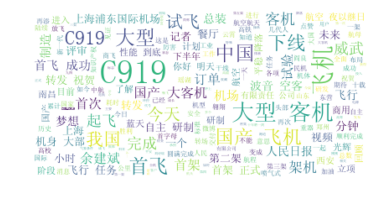

In [57]:
build_word_cloud_chinese("人民日报_正文.csv", stopwords)

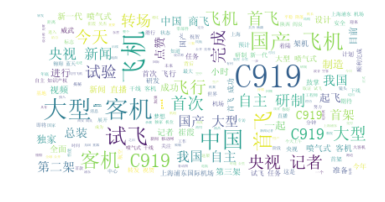

In [58]:
build_word_cloud_chinese("央视新闻_正文.csv", stopwords)

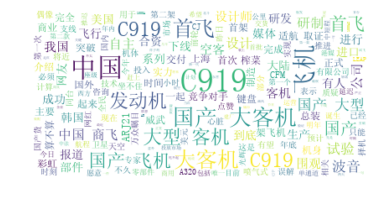

In [59]:
build_word_cloud_chinese("头条新闻_正文.csv", stopwords)

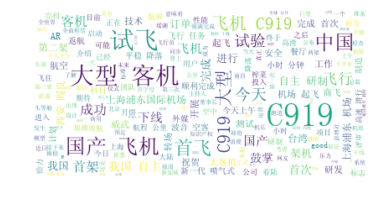

In [61]:
build_word_cloud_chinese("环球时报_正文.csv", stopwords)

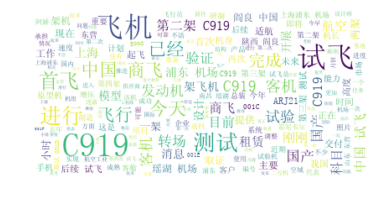

In [62]:
build_word_cloud_chinese("航空物语_正文.csv", stopwords)

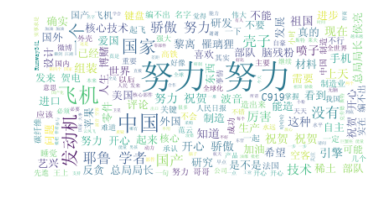

In [45]:
build_word_cloud_chinese("人民日报_评论.csv", stopwords)

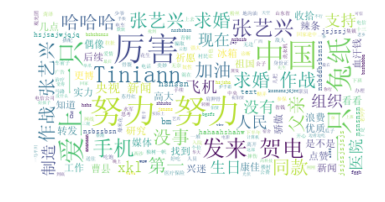

In [33]:
build_word_cloud_chinese("央视新闻_评论.csv", stopwords)

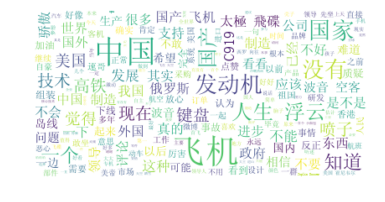

In [48]:
build_word_cloud_chinese("新浪头条_评论.csv", stopwords)

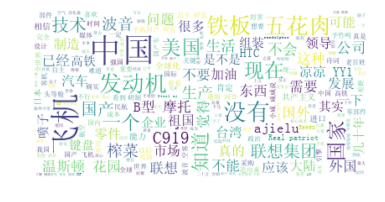

In [49]:
build_word_cloud_chinese("环球时报_评论.csv", stopwords)